#WEB SCRAPING

https://scrapeops.io/blog/the-state-of-web-scraping-2022/


In [1]:
from bs4.element import NavigableString
import spacy
import requests
from bs4 import BeautifulSoup
import re

def get_article_text(url, day_str):
  res = requests.get(url, verify=False)
  html_page = res.content
  soup = BeautifulSoup(html_page, 'html.parser')

  # Checking if the page exists
  text = soup.find('title')
  errormessage = 'Página no encontrada o de acceso restringido'
  if errormessage in text:
    return None

  # Finding the link to each article
  text = soup.find_all(class_ =  "content-item")
  links = []
  for tag in text[0:-1]:
    t = str(tag)
    start = t.find('<a href=')
    end = t.find('.html')
    link = t[start+9:end+5]
    links.append(link)

  output = {'day':[],
            'link':[],
            'kicker':[],
            'headline': [],
            'standfirst':[],
            'body':[]}

  # Extracting text of each article
  notincluded = []
  for l in links:
    if len(l) == 0:
      continue
    res = requests.get(l, verify=False)
    html_page = res.content
    soup = BeautifulSoup(html_page, 'html.parser')

    x = ''
    text =  soup.find(class_ =  ["ue-c-article__headline js-headline js-headlineb",
                                'ue-c-article__headline js-headline js-headlineb ue-c-article__headline--opinion',
                                'entry-hero'])
    if text is None:
      notincluded.append(l)
      continue
    for tag in text:
      x += str(tag)
    output['headline'] += [x]


    text =  soup.find(class_ =  "ue-c-article__standfirst")
    x = ''
    if text:
      for tag in text:
        x += str(tag)
      output['standfirst'] += [x]
    else:
      output['standfirst'] += ['no standfirst']


    if soup.find(class_ =  "ue-c-article__body"):
      text = soup.find(class_ =  "ue-c-article__body")
      x = ''
      for tag in text:
        if type(tag) is NavigableString:
          x += tag
        else:
          x += tag.get_text()
    else:
      text = soup.find(class_ =  "entry-content")
      x = ''
      for tag in text:
        if '<p>' in str(tag):
          x += tag.get_text()
    
    
    output['body'] += [x]

    is_kicker = False
    if soup.find(class_ =  ['ue-c-article__kicker-seo']) is None:
      text = soup.find(class_ =  ['ue-c-article__kicker'])
      if text is None:
        output['kicker'] += ['no kicker']
        is_kicker = True
      else:
        for tag in text:
          output['kicker'] += [str(tag)]
          is_kicker = True
    else:
      text = soup.find(class_ =  ['ue-c-article__kicker-seo'])
      if text is None:
        output['kicker'] += ['no kicker']
        is_kicker=True
      else:
        for tag in text:
          output['kicker'] += [str(tag)]
          is_kicker=True
    if not is_kicker:
      output['kicker'] += ['no kicker']

    output['link'] += [l]
    output['day'] += [day_str]

  return output

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import numpy as np
import pandas as pd
from google.colab import drive
drive.mount('drive')

year2022 = {'01':list(np.arange(17,32)),
            '02':list(np.arange(1,29)),
            '03':list(np.arange(1,32)),
            '04':list(np.arange(1,31)),
            '05':list(np.arange(1,32)),
            '06':list(np.arange(1,31)),
            '07':list(np.arange(1,32)),
            '08':list(np.arange(1,32)),
            '09':list(np.arange(1,31)),
            '10':list(np.arange(1,32)),
            '11':list(np.arange(1,12))}

year2022 = {'10':list(np.arange(2,32)),
            '11':list(np.arange(1,31)),
            '12':list(np.arange(1,18))}

df2022 = pd.DataFrame(columns = ['day','link','kicker','headline','standfirst','body'])

for month in year2022.keys():
  for day in year2022[month]:
    d = str(day)
    if len(d) == 1:
      d = '0' + d
    for n in range(1,7):
      if n == 1:
        url = 'https://www.marca.com/hemeroteca/2022/' + str(month) + '/' + str(d) + '/noticias.html'
      else:
        url = 'https://www.marca.com/hemeroteca/2022/' + str(month) + '/' +str(d) + '/noticias'+ str(n) + '.html'
      day_str = '2022/' + str(month) + '/' + str(d)
      news = get_article_text(url, day_str)
      if news is None:
        continue
      else:
        df = pd.DataFrame.from_dict(news)
        df2022 = pd.concat([df2022, df])
    print(day_str)

EDITAR SI LO DESEA LA LOCALIZACIÓN DONDE SE GUARDA EL FICHERO


In [ ]:
print(len(df2022))

df2022.to_excel('news_articles_4.xlsx')
!cp news_articles_4.xlsx "drive/My Drive/TFG"

#NO CORRER A PARTIR DE AQUÍ

# PREPROCESSING

https://medium.com/product-ai/text-preprocessing-in-python-steps-tools-and-examples-bf025f872908
https://medium.com/towards-data-science/cleaning-preprocessing-text-data-by-building-nlp-pipeline-853148add68a



In [10]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

In [88]:
# Read files from drive
import pandas as pd
#df1 = pd.read_excel('/content/drive/My Drive/TFG/news_articles_1.xlsx')
df1 = pd.read_excel('news_articles_1.xlsx')
#df2 = pd.read_excel('/content/drive/My Drive/TFG/news_articles_2.xlsx')
df2 = pd.read_excel('news_articles_2.xlsx')
#df3 = pd.read_excel('/content/drive/My Drive/TFG/news_articles_3.xlsx')
df3 = pd.read_excel('news_articles_3.xlsx')
df = pd.concat([df1,df2,df3]).reset_index()

In [42]:
#aux = set()
#for index, row in df.iterrows():
    #if row['kicker'] != 'no kicker':
        #aux.add(row['kicker'])

#len(aux)


day  count
0    2022/01/17    258
1    2022/01/18    267
2    2022/01/19    250
3    2022/01/20    243
4    2022/01/21    222
..          ...    ...
253  2022/09/27    222
254  2022/09/28    234
255  2022/09/29    256
256  2022/09/30    243
257  2022/10/01    201

[258 rows x 2 columns]

In [19]:
# Append month column
import datetime

months = []
for index, row in df.iterrows():
    datee = datetime.datetime.strptime(row['day'], "%Y/%m/%d")
    months.append(datee.month)

df['month'] = months

<AxesSubplot:title={'center':'Number of news articles per month'}, xlabel='month'>

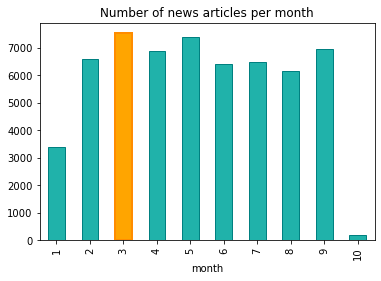

In [83]:
# Plot the number of articles per month
df_gb = df.groupby(['month']).size()
df_gb.plot(kind = 'bar', title='Number of news articles per month', 
           color=['lightseagreen','lightseagreen','orange','lightseagreen','lightseagreen','lightseagreen',
                 'lightseagreen','lightseagreen','lightseagreen','lightseagreen'],
          edgecolor=['teal','teal','darkorange','teal','teal',
                     'teal','teal','teal','teal','teal'],
          linewidth=[1,1,2,1,1,1,1,1,1,1])

In [51]:
# Append day of the week column
aux_df = df.groupby(['day']).size().to_frame().reset_index().rename(columns={0: 'count'})
day_week = []
days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
counter = 0
for index, row in aux_df.iterrows():
    if counter%len(days) == 0:
        i = 0
    day_week.append(days[i])
    i += 1
    counter += 1

aux_df['weekday'] = day_week

<AxesSubplot:title={'center':'Number of news articles per day of the week'}, xlabel='weekday'>

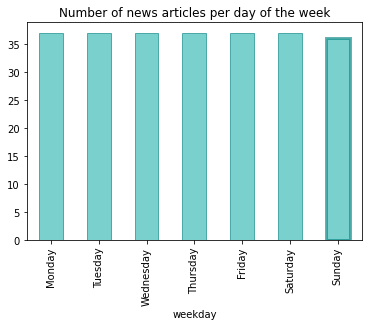

In [129]:
# Plot the number of articles per day of the week
df_gb = aux_df.groupby(['weekday']).size()
custom_dict = {'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday':3, 'Friday':4,'Saturday':5, 'Sunday':6} 
df_gb = df_gb.to_frame().sort_values(by=['weekday'], key=lambda x: x.map(custom_dict)).rename(columns={0: 'count'})
df_gb.plot(kind = 'bar', title='Number of news articles per day of the week', 
           color='lightseagreen',
          edgecolor='teal',
          linewidth=[1,1,1,1,1,1,3],
          legend=None,
          alpha=0.6)

In [110]:
df_gb

count
weekday         
Monday        37
Tuesday       37
Wednesday     37
Thursday      37
Friday        37
Saturday      37
Sunday        36

In [14]:
df.columns

Index(['index', 'Unnamed: 0', 'day', 'link', 'kicker', 'headline',
       'standfirst', 'body'],
      dtype='object')

In [89]:
# Step 1: Remove null values and join columns
df = df.dropna()
print(len(df))


joinedText = []
for index, row in df.iterrows():
    l = [row['kicker'],row['headline'],row['standfirst'],row['body']]
    joinedText.append(' '.join(l))

df['joinedText'] = joinedText

57932


In [97]:
s = 'físicamenteel'

for index, row in df.iterrows():
    if s in row['joinedText']:
        print((row['joinedText']))

f1 2021 fernando alonso se opera el asturiano ha vuelto a pasar por el quirófano. se le han quitado las placas de titanio de la mandíbula. ahora ya sólo piensa en estar al 100% de cara a la temporada 2022 fernando alonso ya ha pasado por el quirófano como tenía previsto hacer en este mes de enero de 2022. al asturiano le tenían que quitar las placas de titanio de la mandíbula. recordemos que el 11 de febrero de 2021 sufrió un accidente de bicicleta en suiza. el bicampeón mundial de f1 pasó un mal rato (sufrió una fractura en la mandíbula superior que requirió cirugía), pero fue capaz de sobreponerse para estar listo de cara al inicio de la temporada pasada.alonso desveló durante las 24 horas de le mans virtuales 2022 que ya ha sido operado con éxito y puede dar por finaliza un proceso que ha durado casi un año. el español, que actuó de capitán del equipo del alpine con el dorsal 36, confesó durante la retransmisión en directo de la carrera virtual: "me han operado la semana pasada y es

In [93]:
df['joinedText'][2]

'Salvados María Galiana: "Cuando el Sevilla ganó los siete paragüeros de Ikea, llamé a mi hijo el palangana y le di la enhorabuena" "Me cae muy bien, yo soy de los perdedores, lo reconozco", ha afirmado la actriz María Galiana, que se declara seguidora del Real Betis, a Gonzo en \'Salvados\' La actriz María Galiana ha sido la protagonista este domingo de \'Salvados\', donde entre otros asuntos, ha hablado con Fernando González González, más conocido como Gonzo, presentador del programa de entrevistas sobre temas de actualidad que se emite los domingos entre las 21.30 y las 22.30 horas en La Sexta, sobre el Real Betis Balompíé, club del que es reconocida aficionada, y el Sevilla Fútbol Club.Gonzo le ha preguntado a María Galiana qué le contaría a su marido, Rafael González Sandino, que murió en el año 2008, de la entidad verdiblanca. "Ay, qué lástima más grande. El Betis está como siempre, para arriba y para abajo, para arriba y para abajo. Cada vez que juega en Europa, baja a Segunda d

In [95]:
# Step 2: Convert to lowercase
df['joinedText'] = df['joinedText'].str.lower()

In [96]:
# Step 3: Remove specific html elements
# https://medium.com/@jorlugaqui/how-to-strip-html-tags-from-a-string-in-python-7cb81a2bbf44

def remove_html_tags(text):
    """Remove html tags from a string"""
    import re
    clean = re.compile('<.*?>')
    return re.sub(clean, ' ', text)

for index, row in df.iterrows():
  row['joinedText'] = remove_html_tags(row['joinedText'])

In [99]:
# Step 4: Remove numbers and special characters
# https://matiasbattocchia.github.io/datitos/Preprocesamiento-de-texto-para-NLP-parte-1.html#Expresiones-regulares

import string
import re

df['joinedText'] = df['joinedText'].str.replace(r'\d+',' ')
df['joinedText'] = df['joinedText'].replace(r'[,;.:¡!¿?@#$%&[\](){}<>~=+\-*/|\\_^`"\']', ' ', regex=True)
def normalize(texto):
    # todo a minúsculas
    texto = texto.lower()

    # tildes y diacríticas
    texto = re.sub('á', 'a', texto)
    texto = re.sub('é', 'e', texto)
    texto = re.sub('í', 'i', texto)
    texto = re.sub('ó', 'o', texto)
    texto = re.sub('ú', 'u', texto)
    texto = re.sub('ü', 'u', texto)
    texto = re.sub('ñ', 'n', texto)

    return texto
 
df['joinedText'] = df['joinedText'].apply(lambda x: normalize(x))

texts = df.joinedText.tolist()

/var/folders/cr/y_rrgmnj7h199fkhvxmytqqc0000gn/T/ipykernel_6759/4268926407.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  df['joinedText'] = df['joinedText'].str.replace(r'\d+',' ')


In [100]:
texts

['supercopa de espana marcelino   no se sabe lo que hubiera pasado de haber marcado el penalti y con uno menos  el tecnico del athletic comparecio en rueda de prensa tras caer en la final de la supercopa de espana ante el real madrid marcelino garcia toral hizo balance de la final ante el real madrid se lamento de las jugadas que terminaron resultando decisivas en las areas y se mostro orgulloso de sus jugadores analisis del partido   fueron muy efectivos  cuando presionamos arriba cometimos un error ante grandes futbolistas y no nos supimos ordenar y aparecio un gran futbolista tras una gran jugada colectiva  teniamos el partido controlado  al poco de empezar la segunda parte hubo una jugada en la que el arbitro pito penalti despues de verlas muchas veces  orgullo y admiracion ante estos futbolistas  competimos contra los grandes  nos falta esa pizca de suerte  de detalles para saber competir estos partidos y cerrarlos con victoria  el tecnico se marcha orgulloso   competimos dignamen

In [ ]:
! python -m spacy download es_core_news_md

In [85]:
# Step ?: tokenization, remove stopwords and lemmatize
# spacy over nltk, time wise. https://spacy.io/models/es

import spacy

tokenized_text = []
nlp = spacy.load("es_core_news_md")
counter = 0
for article in texts:
  if counter%10000 == 0:
    print(counter, ' texts tokenized')
  doc = nlp(article)
  tokenized_article = []
  for token in doc:
    if not token.is_stop and token.pos_ != 'PROPN' and ' ' not in str(token) and '\n' not in str(token):
      tokenized_article.append(token.lemma_)
  tokenized_text.append(tokenized_article)
  counter += 1

tokenized_text

0  texts tokenized
10000  texts tokenized
20000  texts tokenized
30000  texts tokenized
40000  texts tokenized
50000  texts tokenized


[['haber',
  'marcar',
  'penalti',
  'técnico',
  'comparecer',
  'rueda',
  'prensa',
  'caer',
  'balance',
  'lamentar',
  'jugada',
  'terminar',
  'resultar',
  'decisivo',
  'área',
  'mostrar',
  'orgulloso',
  'jugador',
  'partido',
  'efectivo',
  'presionar',
  'cometimo',
  'error',
  'futbolista',
  'supimos',
  'ordenar',
  'aparecer',
  'futbolista',
  'jugada',
  'colectivo',
  'tener',
  'partido',
  'controlado',
  'empezar',
  'jugada',
  'árbitro',
  'pitar',
  'penalti',
  'ver él',
  'orgullo',
  'admiración',
  'futbolista',
  'competir',
  'faltar',
  'pizca',
  'suerte',
  'detalle',
  'competir',
  'partido',
  'cerrar él',
  'victoria',
  'técnico',
  'marchar',
  'orgulloso',
  'competimos',
  'dignamente',
  'rival',
  'pasar',
  'haber',
  'pesar',
  'marcar',
  'penalti',
  'hablar',
  'árbitro',
  'penalti',
  'decir',
  'llamar',
  'llamar',
  'momento',
  'clave',
  'creer',
  'poder',
  'peligro',
  'árbitro',
  'designar'],
 ['orgulloso',
  'vivir',

In [86]:
import pickle
with open("test", "wb") as fp:   #Pickling
    pickle.dump(tokenized_text, fp)

In [43]:
with open("test", "rb") as fp:   # Unpickling
    b = pickle.load(fp)

In [45]:
# Average number of words per article

counts = []
for i in b:
    counts.append(len(i))

print(sum(counts)/(len(counts)))

169.65350756058828


In [47]:
# Top 10 most common lemmas 

dictionary = {}
for article in b:
    for lemma in article:
        if lemma not in dictionary.keys():
            dictionary[lemma] = 1
        else:
            dictionary[lemma] += 1

dict_sorted = dict(sorted(dictionary.items(), key=lambda item: item[1], reverse=True))

first10pairs = {k: dict_sorted[k] for k in list(dict_sorted)[:10]}
first10pairs

{'equipo': 71976,
 'partido': 71260,
 'año': 69451,
 'jugador': 48250,
 'jugar': 42966,
 'temporada': 42114,
 'ganar': 36638,
 'club': 34896,
 'gol': 33845,
 'llegar': 33326}

In [55]:
# Top 10 least common lemmas
dict_sorted_asc = dict(sorted(dictionary.items(), key=lambda item: item[1], reverse=False))

last10pairs = {k: dict_sorted_asc[k] for k in list(dict_sorted_asc)[:30]}
last10pairs

{'balompíé': 1,
 'elyas': 1,
 'imer': 1,
 'torneoalcaraz': 1,
 'trigesimoprimer': 1,
 'metas': 1,
 'pierdear': 1,
 'autobotellazo': 1,
 'espejola': 1,
 'tokse': 1,
 'tijerasla': 1,
 'brugalés': 1,
 'aliñoefe': 1,
 'paisajesarabio': 1,
 'aparentementear': 1,
 'roadbookaunque': 1,
 'canceladás': 1,
 'reengancheque': 1,
 'recorridoque': 1,
 'reglamentariano': 1,
 'antonín': 1,
 'príbram': 1,
 'baráksufrió': 1,
 'niñosu': 1,
 'airesantonín': 1,
 'díaantonín': 1,
 'vidaantonín': 1,
 'barákcampeón': 1,
 'saltoluigi': 1,
 'delneri': 1}

In [53]:
# Word2vec model
import gensim
from gensim.models import Word2Vec

w2v_model = Word2Vec(min_count=1)

w2v_model.build_vocab(b, progress_per=10000)

# save model
# model.save("word2vec.model")


In [54]:
from time import time
t = time()

w2v_model.train(b, total_examples=w2v_model.corpus_count, epochs=30, report_delay=1)

print('Time to train the model: {} mins'.format(round((time() - t) / 60, 2)))

Time to train the model: 4.39 mins


In [62]:
# load model
#model = Word2Vec.load("word2vec.model")

vector = w2v_model.wv['deporte']  # get numpy vector of a word
sims = w2v_model.wv.most_similar('futbol', topn=10)  # get other similar words
sims

[('riveromarcaveir', 0.532421350479126),
 ('fútbol', 0.5118592381477356),
 ('palmeira', 0.47988107800483704),
 ('setsection', 0.46141985058784485),
 ('leagar', 0.44875970482826233),
 ('indisimulado', 0.4446774423122406),
 ('quot', 0.4406246244907379),
 ('riveromarcano', 0.44004684686660767),
 ('mediocampista', 0.4349042475223541),
 ('centrocampista', 0.43075811862945557)]

Preguntas carmen

- Nos interesa quitar los nombres propios? dos pipelines con y sin
- Nos interesa lematizar? perdemos genero de las palabras, no queremos lematizar
- quitar acentos
- textlife, textstudio
- subir a github el codigo